In [6]:
from LOCA2.LOCA2_processor import loca2_processing
from NEX_GDDP_CMIP6.NEX_GDDP_CMIP6_processor import nexgddpcmip6_processing
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import rioxarray
import xarray as xr
import numpy as np
from matplotlib import gridspec

In [2]:
def analysis_facility_format(scenario, year_start, year_end):
    data_tasmax = loca2_processing(scenario, 'tasmax', year_start, year_end)
    data_tasmin = loca2_processing(scenario, 'tasmin', year_start, year_end)
    data_precip = loca2_processing(scenario, 'pr', year_start, year_end)
    
    data_full = xr.merge([data_tasmax, data_tasmin, data_precip], fill_value=np.nan)
    return data_full



def aggregate_models(dataset):
    mean = dataset.mean('model')
    mean['stats'] = 'mean'
    
    stdev = dataset.std('model')
    stdev['stats'] = 'stdev'
    
    variance = dataset.var('model')
    variance['stats'] = 'variance'
    
    data_stats = xr.concat([mean, stdev, variance], 'stats')
    return data_stats

In [3]:
dataset_test = analysis_facility_format('historical', 2000, 2000)
dataset_test.load()

ACCESS-CM2
ACCESS-ESM1-5
AWI-CM-1-1-MR
BCC-CSM2-MR
CESM2-LENS
CNRM-CM6-1-HR
CNRM-CM6-1
CNRM-ESM2-1
CanESM5
EC-Earth3-Veg
EC-Earth3
FGOALS-g3
GFDL-CM4
GFDL-ESM4
HadGEM3-GC31-LL
HadGEM3-GC31-MM
INM-CM4-8
INM-CM5-0
IPSL-CM6A-LR
KACE-1-0-G
MIROC6
MPI-ESM1-2-HR
MPI-ESM1-2-LR
MRI-ESM2-0
NorESM2-LM
NorESM2-MM
TaiESM1
ACCESS-CM2
ACCESS-ESM1-5
AWI-CM-1-1-MR
BCC-CSM2-MR
CESM2-LENS
CNRM-CM6-1-HR
CNRM-CM6-1
CNRM-ESM2-1
CanESM5
EC-Earth3-Veg
EC-Earth3
FGOALS-g3
GFDL-CM4
GFDL-ESM4
HadGEM3-GC31-LL
HadGEM3-GC31-MM
INM-CM4-8
INM-CM5-0
IPSL-CM6A-LR
KACE-1-0-G
MIROC6
MPI-ESM1-2-HR
MPI-ESM1-2-LR
MRI-ESM2-0
NorESM2-LM
NorESM2-MM
TaiESM1
ACCESS-CM2
ACCESS-ESM1-5
AWI-CM-1-1-MR
BCC-CSM2-MR
CESM2-LENS
CNRM-CM6-1-HR
CNRM-CM6-1
CNRM-ESM2-1
CanESM5
EC-Earth3-Veg
EC-Earth3
FGOALS-g3
GFDL-CM4
GFDL-ESM4
HadGEM3-GC31-LL
HadGEM3-GC31-MM
INM-CM4-8
INM-CM5-0
IPSL-CM6A-LR
KACE-1-0-G
MIROC6
MPI-ESM1-2-HR
MPI-ESM1-2-LR
MRI-ESM2-0
NorESM2-LM
NorESM2-MM
TaiESM1


<xarray.Dataset>
Dimensions:  (lon: 109, lat: 108, time: 366, model: 27)
Coordinates:
  * lon      (lon) float64 267.2 267.3 267.3 267.4 ... 273.8 273.8 273.9 274.0
  * lat      (lat) float64 36.03 36.09 36.16 36.22 ... 42.53 42.59 42.66 42.72
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2000-12-31
  * model    (model) <U15 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'TaiESM1'
Data variables:
    tasmax   (model, time, lat, lon) float32 284.3 284.5 284.5 ... nan nan nan
    tasmin   (model, time, lat, lon) float32 271.5 271.3 271.3 ... nan nan nan
    pr       (model, time, lat, lon) float32 2.077e-05 1.832e-05 ... nan nan

# Mean

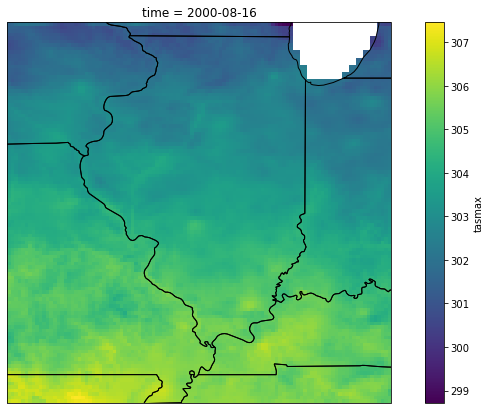

In [22]:
test_result = aggregate_models(dataset_test)
#test_result
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree())
test_result.tasmax.sel(time='2000-08-16').plot()
ax.add_feature(cfeature.STATES)

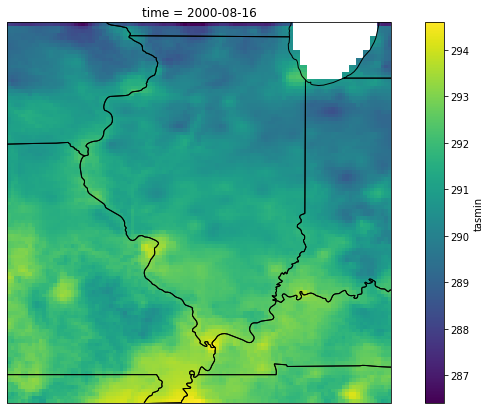

In [23]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree())
test_result.tasmin.sel(time='2000-08-16').plot()
ax.add_feature(cfeature.STATES)

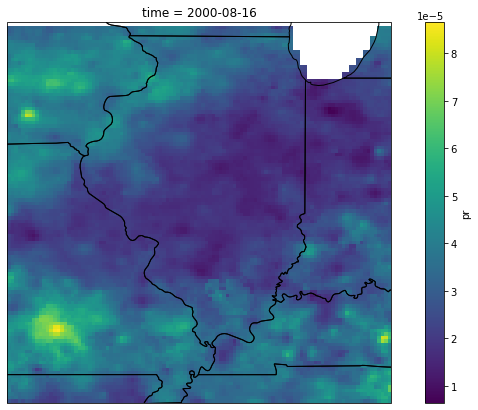

In [24]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree())
test_result.pr.sel(time='2000-08-16').plot()
ax.add_feature(cfeature.STATES)

In [10]:
test_result

<xarray.Dataset>
Dimensions:  (lon: 109, lat: 108, time: 366)
Coordinates:
  * lon      (lon) float64 267.2 267.3 267.3 267.4 ... 273.8 273.8 273.9 274.0
  * lat      (lat) float64 36.03 36.09 36.16 36.22 ... 42.53 42.59 42.66 42.72
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2000-12-31
Data variables:
    tasmax   (time, lat, lon) float32 dask.array<chunksize=(366, 108, 109), meta=np.ndarray>
    tasmin   (time, lat, lon) float32 dask.array<chunksize=(366, 108, 109), meta=np.ndarray>
    pr       (time, lat, lon) float32 dask.array<chunksize=(366, 108, 109), meta=np.ndarray>

# Standard Deviation

/data/keeling/a/mailes2/miniconda3/envs/climatemappingenv/lib/python3.10/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


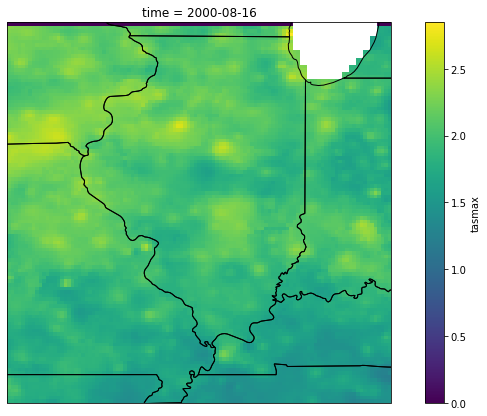

In [15]:
test_result = aggregate_models(dataset_test)
#test_result
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree())
test_result.tasmax.sel(time='2000-08-16').plot() # What are the dots coming from?????
ax.add_feature(cfeature.STATES)

/data/keeling/a/mailes2/miniconda3/envs/climatemappingenv/lib/python3.10/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


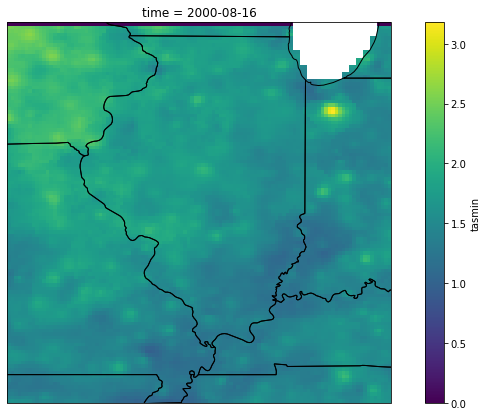

In [17]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree())
test_result.tasmin.sel(time='2000-08-16').plot()
ax.add_feature(cfeature.STATES)

/data/keeling/a/mailes2/miniconda3/envs/climatemappingenv/lib/python3.10/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


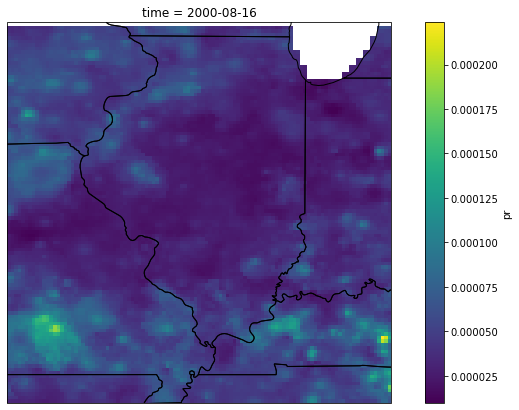

In [18]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree())
test_result.pr.sel(time='2000-08-16').plot()
ax.add_feature(cfeature.STATES)

In [16]:
test_result

<xarray.Dataset>
Dimensions:  (lon: 109, lat: 108, time: 366)
Coordinates:
  * lon      (lon) float64 267.2 267.3 267.3 267.4 ... 273.8 273.8 273.9 274.0
  * lat      (lat) float64 36.03 36.09 36.16 36.22 ... 42.53 42.59 42.66 42.72
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2000-12-31
Data variables:
    tasmax   (time, lat, lon) float32 dask.array<chunksize=(366, 108, 109), meta=np.ndarray>
    tasmin   (time, lat, lon) float32 dask.array<chunksize=(366, 108, 109), meta=np.ndarray>
    pr       (time, lat, lon) float32 dask.array<chunksize=(366, 108, 109), meta=np.ndarray>

# Variance

/data/keeling/a/mailes2/miniconda3/envs/climatemappingenv/lib/python3.10/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


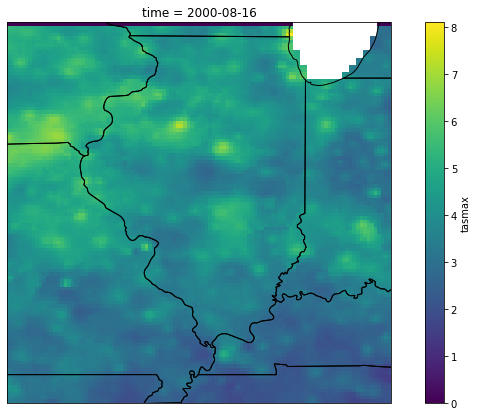

In [27]:
test_result = aggregate_models(dataset_test)
#test_result
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree())
test_result.tasmax.sel(time='2000-08-16').plot() # What are the dots coming from?????
ax.add_feature(cfeature.STATES)

/data/keeling/a/mailes2/miniconda3/envs/climatemappingenv/lib/python3.10/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


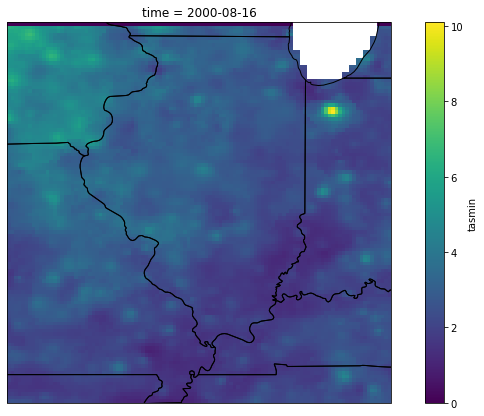

In [28]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree())
test_result.tasmin.sel(time='2000-08-16').plot()
ax.add_feature(cfeature.STATES)

/data/keeling/a/mailes2/miniconda3/envs/climatemappingenv/lib/python3.10/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


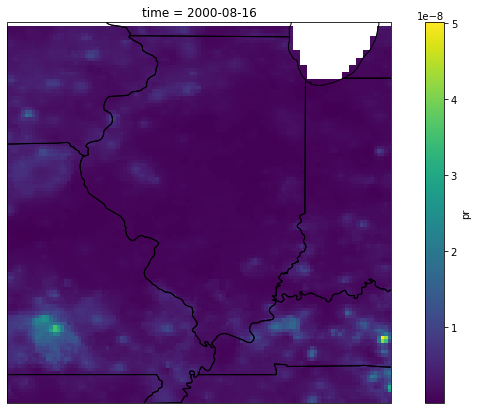

In [29]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree())
test_result.pr.sel(time='2000-08-16').plot()
ax.add_feature(cfeature.STATES)

# Total Analysis

In [4]:
test_result_tot = aggregate_models(dataset_test)
test_result_tot

<xarray.Dataset>
Dimensions:  (lon: 109, lat: 108, time: 366, stats: 3)
Coordinates:
  * lon      (lon) float64 267.2 267.3 267.3 267.4 ... 273.8 273.8 273.9 274.0
  * lat      (lat) float64 36.03 36.09 36.16 36.22 ... 42.53 42.59 42.66 42.72
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2000-12-31
  * stats    (stats) <U8 'mean' 'stdev' 'variance'
Data variables:
    tasmax   (stats, time, lat, lon) float32 282.3 282.6 282.6 ... 0.0 0.0 0.0
    tasmin   (stats, time, lat, lon) float32 268.9 268.9 269.0 ... 0.0 0.0 0.0
    pr       (stats, time, lat, lon) float32 3.187e-05 3.032e-05 ... nan nan

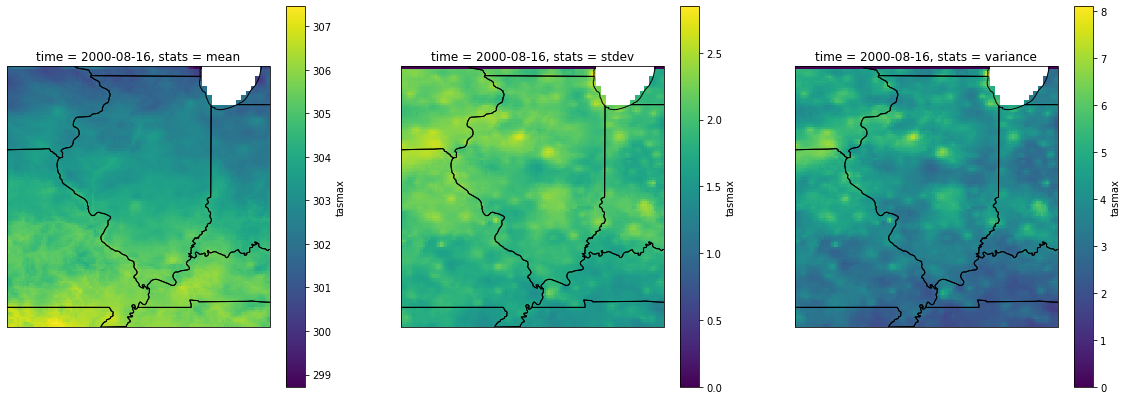

In [9]:
plt.rcParams['figure.figsize'] = [20, 7]
gs = gridspec.GridSpec(nrows=1, ncols=3)
fig = plt.figure()

ax1 = fig.add_subplot(gs[0,0], projection=ccrs.PlateCarree())
test_result_tot.tasmax.sel(time='2000-08-16', stats='mean').plot(ax=ax1, transform=ccrs.PlateCarree())
ax1.add_feature(cfeature.STATES)

ax2 = fig.add_subplot(gs[0,1], projection=ccrs.PlateCarree())
test_result_tot.tasmax.sel(time='2000-08-16', stats='stdev').plot(ax=ax2, transform=ccrs.PlateCarree())
ax2.add_feature(cfeature.STATES)

ax3 = fig.add_subplot(gs[0,2], projection=ccrs.PlateCarree())
test_result_tot.tasmax.sel(time='2000-08-16', stats='variance').plot(ax=ax3, transform=ccrs.PlateCarree())
ax3.add_feature(cfeature.STATES)